In [ ]:
!pip install autogluon

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
from autogluon.tabular import TabularPredictor

# Imporing data 

In [60]:
train=pd.read_csv(r"/content/train.csv")


In [59]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [63]:
train.shape

(10886, 12)

In [64]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [65]:
train.dropna()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [66]:
test = pd.read_csv("/content/test.csv",parse_dates=["datetime"])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [67]:
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


In [68]:
test.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


In [69]:
test.shape

(6493, 9)

In [70]:
test.keys

<bound method NDFrame.keys of                 datetime  season  holiday  ...   atemp  humidity  windspeed
0    2011-01-20 00:00:00       1        0  ...  11.365        56    26.0027
1    2011-01-20 01:00:00       1        0  ...  13.635        56     0.0000
2    2011-01-20 02:00:00       1        0  ...  13.635        56     0.0000
3    2011-01-20 03:00:00       1        0  ...  12.880        56    11.0014
4    2011-01-20 04:00:00       1        0  ...  12.880        56    11.0014
...                  ...     ...      ...  ...     ...       ...        ...
6488 2012-12-31 19:00:00       1        0  ...  12.880        60    11.0014
6489 2012-12-31 20:00:00       1        0  ...  12.880        60    11.0014
6490 2012-12-31 21:00:00       1        0  ...  12.880        60    11.0014
6491 2012-12-31 22:00:00       1        0  ...  13.635        56     8.9981
6492 2012-12-31 23:00:00       1        0  ...  13.635        65     8.9981

[6493 rows x 9 columns]>

In [71]:
submission = pd.read_csv("/content/sampleSubmission.csv")
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


#Step 3: Train a model using AutoGluon’s Tabular Prediction
Requirements:

We are prediting count, so it is the label we are setting.
Ignore casual and registered columns as they are also 

*  Ignore casual and registered columns as they are als not present in the test dataset.
*  Use the root_mean_squared_error as the metric to use for evaluation.

*   Set a time limit of 10 minutes (600 seconds).
* Use the preset best_quality to focus on creating the best model



In [72]:
train=train.drop(['casual','registered'], axis = 1)

In [73]:
predictor = TabularPredictor(label="count",eval_metric="r2").fit(train,time_limit=600,presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20220213_122826/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220213_122826/"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 9
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12095.35 MB
	Train Data (Original)  Memory Usage: 1.52 MB (0.0% of available memory)
	Inferring data type of each feature based on column v

[1000]	train_set's l2: 15328	train_set's r2: 0.533746	valid_set's l2: 18055	valid_set's r2: 0.439332
[2000]	train_set's l2: 13785.7	train_set's r2: 0.58068	valid_set's l2: 17877.1	valid_set's r2: 0.444915


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's l2: 15232.6	train_set's r2: 0.530585	valid_set's l2: 20022.3	valid_set's r2: 0.443843


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's l2: 15649.3	train_set's r2: 0.522702	valid_set's l2: 16588.6	valid_set's r2: 0.497026
[2000]	train_set's l2: 14161.7	train_set's r2: 0.568098	valid_set's l2: 16360.6	valid_set's r2: 0.504036
[3000]	train_set's l2: 13140	train_set's r2: 0.599224	valid_set's l2: 16238.8	valid_set's r2: 0.507662
[4000]	train_set's l2: 12386.5	train_set's r2: 0.622208	valid_set's l2: 16114.5	valid_set's r2: 0.511552
[5000]	train_set's l2: 11788.7	train_set's r2: 0.64045	valid_set's l2: 16089.4	valid_set's r2: 0.512179
[6000]	train_set's l2: 11254	train_set's r2: 0.656801	valid_set's l2: 16055.4	valid_set's r2: 0.513193


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's l2: 15408.5	train_set's r2: 0.524138	valid_set's l2: 19127.7	valid_set's r2: 0.478402
[2000]	train_set's l2: 13884.7	train_set's r2: 0.571151	valid_set's l2: 18915.8	valid_set's r2: 0.484176
[3000]	train_set's l2: 12867	train_set's r2: 0.602611	valid_set's l2: 18877.5	valid_set's r2: 0.485291
[4000]	train_set's l2: 12068.7	train_set's r2: 0.627246	valid_set's l2: 18830.4	valid_set's r2: 0.486634


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's l2: 15592.8	train_set's r2: 0.529687	valid_set's l2: 16397.2	valid_set's r2: 0.445521
[2000]	train_set's l2: 14053.4	train_set's r2: 0.576101	valid_set's l2: 16129.9	valid_set's r2: 0.454513
[3000]	train_set's l2: 13024.3	train_set's r2: 0.607119	valid_set's l2: 16086.8	valid_set's r2: 0.455967
[4000]	train_set's l2: 12242.3	train_set's r2: 0.630736	valid_set's l2: 16051.3	valid_set's r2: 0.4571


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's l2: 15538.6	train_set's r2: 0.52874	valid_set's l2: 18250.6	valid_set's r2: 0.418188
[2000]	train_set's l2: 14104.9	train_set's r2: 0.57219	valid_set's l2: 17915.6	valid_set's r2: 0.428875
[3000]	train_set's l2: 13136.5	train_set's r2: 0.601614	valid_set's l2: 17824.7	valid_set's r2: 0.431713
[4000]	train_set's l2: 12376.4	train_set's r2: 0.624628	valid_set's l2: 17814.8	valid_set's r2: 0.43196
[5000]	train_set's l2: 11762.6	train_set's r2: 0.643258	valid_set's l2: 17763.7	valid_set's r2: 0.433671


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's l2: 15378.5	train_set's r2: 0.532816	valid_set's l2: 19419.7	valid_set's r2: 0.390061
[2000]	train_set's l2: 13881.3	train_set's r2: 0.5783	valid_set's l2: 19130.3	valid_set's r2: 0.398951
[3000]	train_set's l2: 12859.5	train_set's r2: 0.609322	valid_set's l2: 19012.7	valid_set's r2: 0.402681
[4000]	train_set's l2: 12107	train_set's r2: 0.632211	valid_set's l2: 18977.2	valid_set's r2: 0.403808


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's l2: 15492.8	train_set's r2: 0.526852	valid_set's l2: 18336.5	valid_set's r2: 0.451093


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's l2: 15420.6	train_set's r2: 0.530818	valid_set's l2: 18927.9	valid_set's r2: 0.413354
[2000]	train_set's l2: 13872.7	train_set's r2: 0.577949	valid_set's l2: 18676.9	valid_set's r2: 0.421144
[3000]	train_set's l2: 12870.3	train_set's r2: 0.608454	valid_set's l2: 18562.8	valid_set's r2: 0.424758
[4000]	train_set's l2: 12096	train_set's r2: 0.631942	valid_set's l2: 18557.7	valid_set's r2: 0.424816


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's l2: 15535.3	train_set's r2: 0.528587	valid_set's l2: 17552	valid_set's r2: 0.441059


	0.4522	 = Validation score   (r2)
	120.58s	 = Training   runtime
	3.65s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 267.02s of the 466.98s of remaining time.
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and

[1000]	train_set's l2: 9220.16	train_set's r2: 0.718792	valid_set's l2: 15190.4	valid_set's r2: 0.53965


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's l2: 8977.16	train_set's r2: 0.722756	valid_set's l2: 18396.9	valid_set's r2: 0.498428


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's l2: 9083.14	train_set's r2: 0.724494	valid_set's l2: 17447.1	valid_set's r2: 0.443762


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's l2: 9056.1	train_set's r2: 0.723412	valid_set's l2: 17297.8	valid_set's r2: 0.482139


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	0.4666	 = Validation score   (r2)
	28.97s	 = Training   runtime
	0.53s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 235.99s of the 435.95s of remaining time.
	0.5723	 = Validation score   (r2)
	11.38s	 = Training   runtime
	0.46s	 = Validation runtime
Fitting model: Ca

In [74]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3   0.598586       7.710993  478.409748                0.000872           0.375357            3       True         18
1   NeuralNetFastAI_BAG_L2   0.595325       6.721560  424.908490                0.435607         137.585671            2       True         16
2        LightGBMXT_BAG_L2   0.587956       6.531969  304.921817                0.246017          17.598998            2       True         11
3          CatBoost_BAG_L2   0.584688       6.326872  313.837772                0.040920          26.514954            2       True         14
4          LightGBM_BAG_L2   0.582123       6.385966  299.001554                0.100013          11.678735            2       True         12
5           XGBoost_BAG_L2   0.579666       6.366588  301.305001                

{'leaderboard':                      model  score_val  ...  can_infer  fit_order
 0      WeightedEnsemble_L3   0.598586  ...       True         18
 1   NeuralNetFastAI_BAG_L2   0.595325  ...       True         16
 2        LightGBMXT_BAG_L2   0.587956  ...       True         11
 3          CatBoost_BAG_L2   0.584688  ...       True         14
 4          LightGBM_BAG_L2   0.582123  ...       True         12
 5           XGBoost_BAG_L2   0.579666  ...       True         17
 6     ExtraTreesMSE_BAG_L2   0.578007  ...       True         15
 7   RandomForestMSE_BAG_L1   0.572330  ...       True          5
 8      WeightedEnsemble_L2   0.572330  ...       True         10
 9   RandomForestMSE_BAG_L2   0.566317  ...       True         13
 10    ExtraTreesMSE_BAG_L1   0.494906  ...       True          7
 11    LightGBMLarge_BAG_L1   0.479098  ...       True          9
 12         LightGBM_BAG_L1   0.466619  ...       True          4
 13          XGBoost_BAG_L1   0.466462  ...       True       

#Create Predictions from test data

In [75]:
predictions = predictor.predict(test)
predictions.head()

0     98.457962
1     91.900642
2     91.924492
3    106.938080
4    106.863907
Name: count, dtype: float32

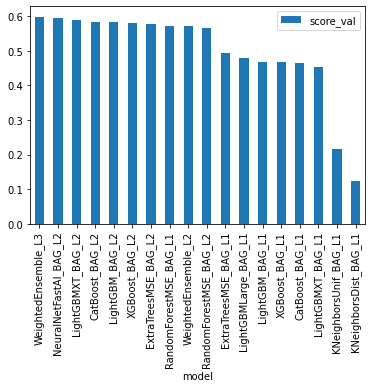

In [91]:
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [77]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      211.644424
std       127.758316
min       -16.561640
25%       106.324463
50%       195.886993
75%       297.974823
max       654.455688
Name: count, dtype: float64

In [78]:
# How many negative values do we have?
ct=0
for i in predictions:
    if i<0:
        ct+=1
print(ct)

2


In [79]:
# Set them to zero
for j,i in enumerate(predictions):
    if i<0:
        predictions[j]=0
predictions.describe()

count    6493.000000
mean      211.647827
std       127.752441
min         0.000000
25%       106.324463
50%       195.886993
75%       297.974823
max       654.455688
Name: count, dtype: float64

In [92]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

#Step 4: Exploratory Data Analysis and Creating an additional feature

Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba74332890>,
      dtype=object)

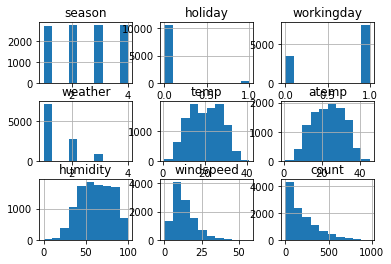

In [85]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist()

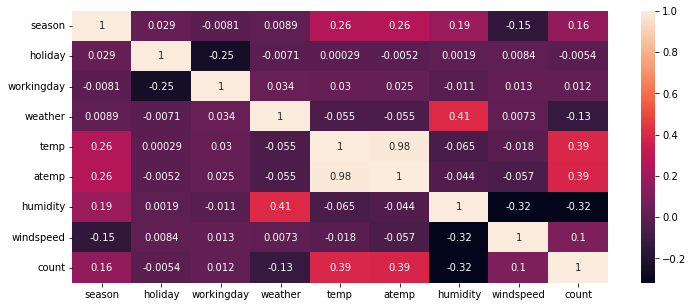

In [86]:
#Heat map for train data
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize=(12,5))
sns.heatmap(train.corr(),annot=True)
plt.show()

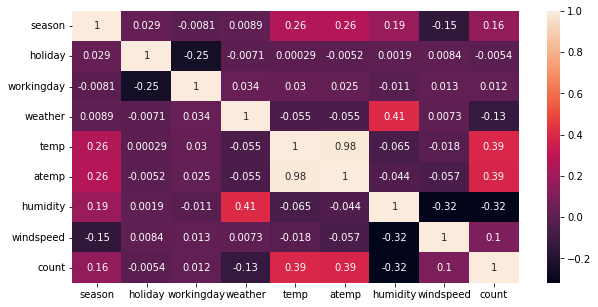

In [87]:
#Heat map for test data
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,5))
sns.heatmap(train.corr(),annot=True)
plt.show()

In [106]:
train["year"] = pd.to_datetime(train["datetime"]).dt.year

In [107]:
train["month"]=pd.to_datetime(train["datetime"]).dt.month

In [108]:
train["day"]=pd.to_datetime(train["datetime"]).dt.day


In [109]:
train.drop(["datetime"], axis=1, inplace=True)

In [116]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,weekday,month,day
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,2011-01-01 00:00:00,1,1
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,2011-01-01 01:00:00,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,2011-01-01 02:00:00,1,1
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,2011-01-01 03:00:00,1,1
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,2011-01-01 04:00:00,1,1


In [112]:
test["year"] = pd.to_datetime(test["datetime"]).dt.year

In [113]:
test["month"]=pd.to_datetime(test["datetime"]).dt.month

In [114]:

test["day"]=pd.to_datetime(test["datetime"]).dt.day

In [115]:
test.drop(["datetime"], axis=1, inplace=True)

In [117]:
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,weekday,year,month,day
0,1,0,1,1,10.66,11.365,56,26.0027,2011-01-20 00:00:00,2011-01-20 00:00:00,2011,1,20
1,1,0,1,1,10.66,13.635,56,0.0000,2011-01-20 01:00:00,2011-01-20 01:00:00,2011,1,20
2,1,0,1,1,10.66,13.635,56,0.0000,2011-01-20 02:00:00,2011-01-20 02:00:00,2011,1,20
3,1,0,1,1,10.66,12.880,56,11.0014,2011-01-20 03:00:00,2011-01-20 03:00:00,2011,1,20
4,1,0,1,1,10.66,12.880,56,11.0014,2011-01-20 04:00:00,2011-01-20 04:00:00,2011,1,20


#Make category types for these so models know they are not just numbers
AutoGluon originally sees these as ints, but in reality they are int representations of a category.
Setting the dtype to category will classify these as categories in AutoGluon.

In [118]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba6b4caf90>,
      dtype=object)

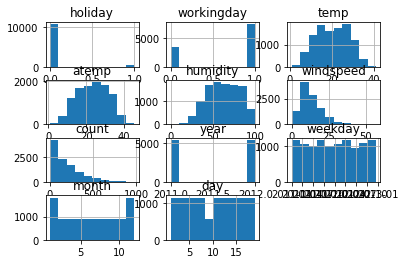

In [119]:
train.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba6877b1d0>,
      dtype=object)

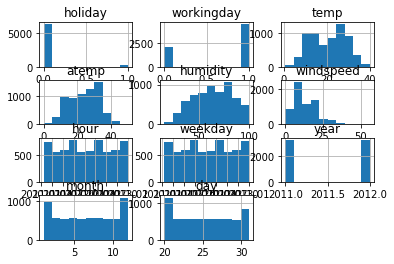

In [120]:
test.hist()

#Step 5: Rerun the model with the same settings as before, just with more features

In [121]:
predictor_new_features = TabularPredictor(label="count",eval_metric="r2").fit(train_data=train,time_limit=600,presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20220213_131912/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220213_131912/"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 12
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11110.92 MB
	Train Data (Original)  Memory Usage: 0.89 MB (0.0% of available memory)
	Inferring data type of each feature based on column 

[1000]	train_set's l2: 12994.4	train_set's r2: 0.604741	valid_set's l2: 16903.6	valid_set's r2: 0.474939
[2000]	train_set's l2: 10961.6	train_set's r2: 0.666577	valid_set's l2: 16744.1	valid_set's r2: 0.479992


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's l2: 13202	train_set's r2: 0.597322	valid_set's l2: 15871.6	valid_set's r2: 0.51881


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's l2: 12919.3	train_set's r2: 0.601017	valid_set's l2: 18439.3	valid_set's r2: 0.497203
[2000]	train_set's l2: 10940.8	train_set's r2: 0.662085	valid_set's l2: 17999.8	valid_set's r2: 0.509088
[3000]	train_set's l2: 9702.57	train_set's r2: 0.700301	valid_set's l2: 17923.5	valid_set's r2: 0.511342
[4000]	train_set's l2: 8766.07	train_set's r2: 0.729274	valid_set's l2: 17847.6	valid_set's r2: 0.513316
[5000]	train_set's l2: 8047.73	train_set's r2: 0.751431	valid_set's l2: 17839.1	valid_set's r2: 0.513596


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's l2: 13174	train_set's r2: 0.60265	valid_set's l2: 15390.7	valid_set's r2: 0.479478
[2000]	train_set's l2: 11073.4	train_set's r2: 0.666028	valid_set's l2: 15289.9	valid_set's r2: 0.48286


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's l2: 13009.3	train_set's r2: 0.60544	valid_set's l2: 17433	valid_set's r2: 0.444285
[2000]	train_set's l2: 10989.5	train_set's r2: 0.666663	valid_set's l2: 17146.3	valid_set's r2: 0.453282
[3000]	train_set's l2: 9716.12	train_set's r2: 0.705309	valid_set's l2: 16974.6	valid_set's r2: 0.4589
[4000]	train_set's l2: 8805.99	train_set's r2: 0.732938	valid_set's l2: 16893.8	valid_set's r2: 0.461496
[5000]	train_set's l2: 8110.15	train_set's r2: 0.754026	valid_set's l2: 16830.2	valid_set's r2: 0.463282


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's l2: 12969.8	train_set's r2: 0.606035	valid_set's l2: 18469.4	valid_set's r2: 0.419701
[2000]	train_set's l2: 10971.5	train_set's r2: 0.666696	valid_set's l2: 18078.6	valid_set's r2: 0.432032
[3000]	train_set's l2: 9695.01	train_set's r2: 0.705472	valid_set's l2: 17969.6	valid_set's r2: 0.435517
[4000]	train_set's l2: 8750.12	train_set's r2: 0.734191	valid_set's l2: 17936.6	valid_set's r2: 0.436482


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's l2: 13052.4	train_set's r2: 0.601352	valid_set's l2: 17452.1	valid_set's r2: 0.477624
[2000]	train_set's l2: 11014.8	train_set's r2: 0.663629	valid_set's l2: 17192.5	valid_set's r2: 0.485169
[3000]	train_set's l2: 9721.32	train_set's r2: 0.70308	valid_set's l2: 17135.7	valid_set's r2: 0.486992
[4000]	train_set's l2: 8800.3	train_set's r2: 0.73126	valid_set's l2: 17126.6	valid_set's r2: 0.487226


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's l2: 12903.7	train_set's r2: 0.607372	valid_set's l2: 18142.1	valid_set's r2: 0.437769
[2000]	train_set's l2: 10874.3	train_set's r2: 0.669102	valid_set's l2: 17967	valid_set's r2: 0.443227
[3000]	train_set's l2: 9603.63	train_set's r2: 0.707764	valid_set's l2: 17972.4	valid_set's r2: 0.442849


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's l2: 13061.9	train_set's r2: 0.603645	valid_set's l2: 16864.6	valid_set's r2: 0.462817
[2000]	train_set's l2: 11006.6	train_set's r2: 0.666003	valid_set's l2: 16658.3	valid_set's r2: 0.469484
[3000]	train_set's l2: 9698.62	train_set's r2: 0.705688	valid_set's l2: 16589.4	valid_set's r2: 0.471692
[4000]	train_set's l2: 8789.22	train_set's r2: 0.733262	valid_set's l2: 16503.2	valid_set's r2: 0.474467


	0.4774	 = Validation score   (r2)
	125.68s	 = Training   runtime
	4.31s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 262.96s of the 462.96s of remaining time.
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and

[1000]	train_set's l2: 8133.21	train_set's r2: 0.748816	valid_set's l2: 17877.7	valid_set's r2: 0.512543


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's l2: 8215.86	train_set's r2: 0.750792	valid_set's l2: 16752.5	valid_set's r2: 0.465913


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's l2: 8218.74	train_set's r2: 0.750319	valid_set's l2: 18041.3	valid_set's r2: 0.433278


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's l2: 8317.78	train_set's r2: 0.745974	valid_set's l2: 17158.8	valid_set's r2: 0.486414


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's l2: 8188.8	train_set's r2: 0.751522	valid_set's l2: 16628.1	valid_set's r2: 0.470471


	0.4794	 = Validation score   (r2)
	32.29s	 = Training   runtime
	0.75s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 228.05s of the 428.06s of remaining time.
	0.5802	 = Validation score   (r2)
	10.06s	 = Training   runtime
	0.47s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 216.16s of the 416.16s of remaining time.
	0.4644	 = Validation score   (r2)
	163.59s	 = Training   runtime
	0.17s	 = Validation runtime
Fitting model: ExtraTreesMSE_BAG_L1 ... Training model for up to 52.2s of the 252.2s of remaining time.
	0.5182	 = Validation score   (r2)
	4.25s	 = Training   runtime
	0.46s	 = Validation runtime
Fitting model: NeuralNetFastAI_BAG_L1 ... Training model for up to 46.3s of the 246.3s of remaining time.
	Ran out of time, stopping training early. (Stopping on epoch 2)
	Ran out of time, stopping training early. (Stopping on epoch 6)
	Ran out of time, stopping training early. (Stopping on epoch 4)
	Ran out

In [122]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3   0.599991       8.962042  524.953645                0.001472           0.317490            3       True         16
1   NeuralNetFastAI_BAG_L2   0.592702       7.826220  439.908038                0.548704          60.219671            2       True         15
2        LightGBMXT_BAG_L2   0.592669       7.590858  397.165453                0.313342          17.477086            2       True         10
3          CatBoost_BAG_L2   0.592326       7.368394  439.182307                0.090878          59.493940            2       True         13
4          LightGBM_BAG_L2   0.587129       7.403640  392.924955                0.126124          13.236588            2       True         11
5     ExtraTreesMSE_BAG_L2   0.585570       8.007646  387.445459                

{'leaderboard':                      model  score_val  ...  can_infer  fit_order
 0      WeightedEnsemble_L3   0.599991  ...       True         16
 1   NeuralNetFastAI_BAG_L2   0.592702  ...       True         15
 2        LightGBMXT_BAG_L2   0.592669  ...       True         10
 3          CatBoost_BAG_L2   0.592326  ...       True         13
 4          LightGBM_BAG_L2   0.587129  ...       True         11
 5     ExtraTreesMSE_BAG_L2   0.585570  ...       True         14
 6      WeightedEnsemble_L2   0.580212  ...       True          9
 7   RandomForestMSE_BAG_L1   0.580207  ...       True          5
 8   RandomForestMSE_BAG_L2   0.573355  ...       True         12
 9     ExtraTreesMSE_BAG_L1   0.518163  ...       True          7
 10         LightGBM_BAG_L1   0.479395  ...       True          4
 11       LightGBMXT_BAG_L1   0.477390  ...       True          3
 12         CatBoost_BAG_L1   0.464374  ...       True          6
 13  NeuralNetFastAI_BAG_L1   0.387910  ...       True       

In [124]:
# Remember to set all negative values to zero
# Set them to zero
for j,i in enumerate(predictions):
    if i<0:
        predictions[j]=0
predictions.describe()

count    6493.000000
mean      211.647827
std       127.752441
min         0.000000
25%       106.324463
50%       195.886993
75%       297.974823
max       654.455688
Name: count, dtype: float64

In [127]:
# Same submitting predictions
submission_new_features = pd.read_csv('/content/submission.csv', parse_dates=["datetime"])
submission_new_features["count"] = predictions
submission_new_features.to_csv("submission_new_features.csv", index=False)

Step 6: Hyper parameter optimization
There are many options for hyper parameter optimization.


*  Options are to change the AutoGluon higher level parameters or the individual model hyperparameters. 
*  The hyperparameters of the models themselves that are in AutoGluon.
*  Those need the hyperparameter and hyperparameter_tune_kwargs arguments.

#Hypothesis Case -1

In [130]:
import autogluon.core as ag
#import autogluon.tabular.TabularPrediction
#import TabularPrediction as task

num_trials = 5  # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'auto' 

nn_options = {  # specifies non-default hyperparameter values for neural network models
    'num_epochs': 10,  # number of training epochs (controls training time of NN models)
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)
    'layers': ag.space.Categorical([100], [1000], [200, 100], [300, 200, 100]),  # each choice for categorical hyperparameter 'layers' corresponds to list of sizes for each NN layer to use
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)
}

gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 100,  # number of boosting rounds (controls training time of GBM models)
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
}


hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN': nn_options, 
                  } 

hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}                  


predictor_new_hypothesis_1 = TabularPredictor(label='count', eval_metric="r2").fit(train, presets='best_quality', time_limit=900, hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs)
#predictor_new_hypothesis_1 = task.fit(train_data=train, label='count',
#                     time_limits=600, eval_metric="r2", 
#                     hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs, 

No path specified. Models will be saved in: "AutogluonModels/ag-20220213_134213/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 900s
AutoGluon will save models to "AutogluonModels/ag-20220213_134213/"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 12
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10955.35 MB
	Train Data (Original)  Memory Usage: 0.89 MB (0.0% of available memory)
	Inferring data type of each feature based on column 

  0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a f

  0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a f

In [131]:
predictor_new_hypothesis_1.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0    LightGBM_BAG_L2/T3   0.457458      12.841875  586.151454                1.240735          62.975685            2       True         10
1   WeightedEnsemble_L3   0.457458      12.842602  586.439883                0.000727           0.288429            3       True         12
2    LightGBM_BAG_L2/T0   0.457292      12.823691  585.554820                1.222550          62.379051            2       True          7
3    LightGBM_BAG_L2/T4   0.457291      12.782865  585.201807                1.181724          62.026038            2       True         11
4    LightGBM_BAG_L2/T1   0.457265      12.831604  585.479471                1.230464          62.303702            2       True          8
5    LightGBM_BAG_L2/T2   0.457182      12.893515  586.676663                1.292375          63.

{'leaderboard':                   model  score_val  ...  can_infer  fit_order
 0    LightGBM_BAG_L2/T3   0.457458  ...       True         10
 1   WeightedEnsemble_L3   0.457458  ...       True         12
 2    LightGBM_BAG_L2/T0   0.457292  ...       True          7
 3    LightGBM_BAG_L2/T4   0.457291  ...       True         11
 4    LightGBM_BAG_L2/T1   0.457265  ...       True          8
 5    LightGBM_BAG_L2/T2   0.457182  ...       True          9
 6    LightGBM_BAG_L1/T4   0.447985  ...       True          5
 7   WeightedEnsemble_L2   0.447985  ...       True          6
 8    LightGBM_BAG_L1/T3   0.447607  ...       True          4
 9    LightGBM_BAG_L1/T0   0.447533  ...       True          1
 10   LightGBM_BAG_L1/T2   0.447438  ...       True          3
 11   LightGBM_BAG_L1/T1   0.447383  ...       True          2
 
 [12 rows x 9 columns],
 'max_stack_level': 3,
 'model_best': 'WeightedEnsemble_L3',
 'model_fit_times': {'LightGBM_BAG_L1/T0': 103.74670648574829,
  'LightGBM_BAG_

In [144]:
# Remember to set all negative values to zero
# Set them to zero
for j,i in enumerate(predictions):
    if i<0:
        predictions[j]=0
predictions.describe()

count    6493.000000
mean      197.213562
std       110.388489
min        53.302429
25%       116.164589
50%       160.668579
75%       266.124237
max       580.060547
Name: count, dtype: float64

In [132]:
predictions=predictor_new_hypothesis_1.predict(test)

In [135]:
# Same submitting predictions
submission_new_hypothesis_1 = pd.read_csv('/content/submission.csv', parse_dates=["datetime"])
submission_new_hypothesis_1["count"] = predictions
submission_new_hypothesis_1.to_csv("submission_new_hpo1.csv", index=False)

#Hypothesis Case -2

In [138]:
import autogluon.core as ag
#import autogluon.tabular.TabularPrediction
#import TabularPrediction as task

num_trials = 5  # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'auto' 

nn_options = {  # specifies non-default hyperparameter values for neural network models
    'num_epochs': 20,  # number of training epochs (controls training time of NN models)
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)
    'layers': ag.space.Categorical([100], [1000], [200, 100], [300, 200, 100]),  # each choice for categorical hyperparameter 'layers' corresponds to list of sizes for each NN layer to use
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)
}

gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 50,  # number of boosting rounds (controls training time of GBM models)
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
}


hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN': nn_options, 
                  } 

hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}                  


predictor_new_hypothesis_2 = TabularPredictor(label='count', eval_metric="r2").fit(train, presets='best_quality', time_limit=600, hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs)
#predictor_new_hypothesis_2 = task.fit(train_data=train, label='count',
#                     time_limits=600, eval_metric="r2", 
#                     hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs, 
#                     presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20220213_140159/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220213_140159/"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 12
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10886.47 MB
	Train Data (Original)  Memory Usage: 0.89 MB (0.0% of available memory)
	Inferring data type of each feature based on column 

  0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a f

  0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a f

In [139]:
predictor_new_hypothesis_2.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0    LightGBM_BAG_L2/T4   0.439379      10.572094  398.832956                0.829210          36.539545            2       True         11
1   WeightedEnsemble_L3   0.439379      10.574294  399.115246                0.002200           0.282290            3       True         12
2    LightGBM_BAG_L2/T3   0.439136      10.579357  399.311884                0.836472          37.018472            2       True         10
3    LightGBM_BAG_L2/T0   0.439124      10.605480  398.855086                0.862596          36.561674            2       True          7
4    LightGBM_BAG_L2/T1   0.438833      10.578514  398.983728                0.835629          36.690317            2       True          8
5    LightGBM_BAG_L2/T2   0.438274      10.579193  398.774574                0.836308          36.

{'leaderboard':                   model  score_val  ...  can_infer  fit_order
 0    LightGBM_BAG_L2/T4   0.439379  ...       True         11
 1   WeightedEnsemble_L3   0.439379  ...       True         12
 2    LightGBM_BAG_L2/T3   0.439136  ...       True         10
 3    LightGBM_BAG_L2/T0   0.439124  ...       True          7
 4    LightGBM_BAG_L2/T1   0.438833  ...       True          8
 5    LightGBM_BAG_L2/T2   0.438274  ...       True          9
 6    LightGBM_BAG_L1/T3   0.422904  ...       True          4
 7   WeightedEnsemble_L2   0.422904  ...       True          6
 8    LightGBM_BAG_L1/T0   0.422838  ...       True          1
 9    LightGBM_BAG_L1/T2   0.422631  ...       True          3
 10   LightGBM_BAG_L1/T4   0.422547  ...       True          5
 11   LightGBM_BAG_L1/T1   0.422502  ...       True          2
 
 [12 rows x 9 columns],
 'max_stack_level': 3,
 'model_best': 'WeightedEnsemble_L3',
 'model_fit_times': {'LightGBM_BAG_L1/T0': 71.66987252235413,
  'LightGBM_BAG_L

In [145]:
# Remember to set all negative values to zero
# Set them to zero
for j,i in enumerate(predictions):
    if i<0:
        predictions[j]=0
predictions.describe()

count    6493.000000
mean      197.213562
std       110.388489
min        53.302429
25%       116.164589
50%       160.668579
75%       266.124237
max       580.060547
Name: count, dtype: float64

In [171]:
predictions=predictor_new_hypothesis_2.predict(test)

In [147]:
# Same submitting predictions
submission_new_hypothesis_2 = pd.read_csv('/content/submission.csv', parse_dates=["datetime"])
submission_new_hypothesis_2["count"] = predictions
submission_new_hypothesis_2.to_csv("submission_new_hpo2.csv", index=False)


#Hypothesis case -3

In [148]:
predictor_new_hypothesis_3 = TabularPredictor(label='count', eval_metric="r2").fit(train, presets='best_quality', time_limit=900, hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs)
#predictor_new_hypothesis_3 = task.fit(train_data=train, label='count',
#                     time_limits=600, eval_metric="r2", 
#                     hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs, 
#                     presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20220213_143020/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 900s
AutoGluon will save models to "AutogluonModels/ag-20220213_143020/"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 12
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10923.0 MB
	Train Data (Original)  Memory Usage: 0.89 MB (0.0% of available memory)
	Inferring data type of each feature based on column v

  0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a f

  0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a f

In [149]:
predictor_new_hypothesis_3.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0    LightGBM_BAG_L2/T4   0.439255      13.829628  498.572979                1.703907          76.434190            2       True         11
1   WeightedEnsemble_L3   0.439255      13.830881  498.959749                0.001253           0.386770            3       True         12
2    LightGBM_BAG_L2/T3   0.439171      13.903821  502.851550                1.778100          80.712760            2       True         10
3    LightGBM_BAG_L2/T0   0.439153      13.935540  500.473773                1.809819          78.334983            2       True          7
4    LightGBM_BAG_L2/T1   0.439029      13.828015  499.419055                1.702294          77.280265            2       True          8
5    LightGBM_BAG_L2/T2   0.438796      13.822551  501.965605                1.696829          79.

{'leaderboard':                   model  score_val  ...  can_infer  fit_order
 0    LightGBM_BAG_L2/T4   0.439255  ...       True         11
 1   WeightedEnsemble_L3   0.439255  ...       True         12
 2    LightGBM_BAG_L2/T3   0.439171  ...       True         10
 3    LightGBM_BAG_L2/T0   0.439153  ...       True          7
 4    LightGBM_BAG_L2/T1   0.439029  ...       True          8
 5    LightGBM_BAG_L2/T2   0.438796  ...       True          9
 6    LightGBM_BAG_L1/T3   0.423181  ...       True          4
 7   WeightedEnsemble_L2   0.423181  ...       True          6
 8    LightGBM_BAG_L1/T0   0.423079  ...       True          1
 9    LightGBM_BAG_L1/T4   0.423032  ...       True          5
 10   LightGBM_BAG_L1/T1   0.422951  ...       True          2
 11   LightGBM_BAG_L1/T2   0.422787  ...       True          3
 
 [12 rows x 9 columns],
 'max_stack_level': 3,
 'model_best': 'WeightedEnsemble_L3',
 'model_fit_times': {'LightGBM_BAG_L1/T0': 83.97023248672485,
  'LightGBM_BAG_L

In [150]:
predictions=predictor_new_hypothesis_3.predict(test)

In [151]:
# Remember to set all negative values to zero
# Set them to zero
for j,i in enumerate(predictions):
    if i<0:
        predictions[j]=0
predictions.describe()

count    6493.000000
mean      197.348495
std       110.124535
min        53.410919
25%       116.151810
50%       160.971619
75%       266.438873
max       577.526550
Name: count, dtype: float64

In [153]:
# Same submitting predictions
submission_new_hypothesis_3 = pd.read_csv('/content/submission.csv', parse_dates=["datetime"])
submission_new_hypothesis_3["count"] = predictions
submission_new_hypothesis_3.to_csv("submission_new_hpo3.csv", index=False)

#Step 7: Write a Report
Refer to the markdown file for the full report
Creating plots and table for report

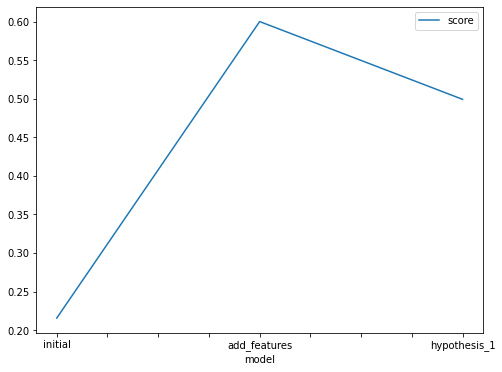

In [154]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hypothesis_1"],
        "score": [.2157, 0.6, 0.4992]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

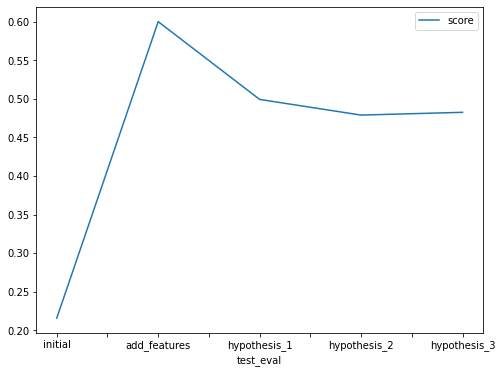

In [168]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig1 = pd.DataFrame(
    {
        "test_eval": ["initial","add_features","hypothesis_1","hypothesis_2","hypothesis_3"],
        "score": [.2157, 0.6, 0.4992, .4789, .4825]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig1.savefig('model_test_score.png')

AttributeError: ignored

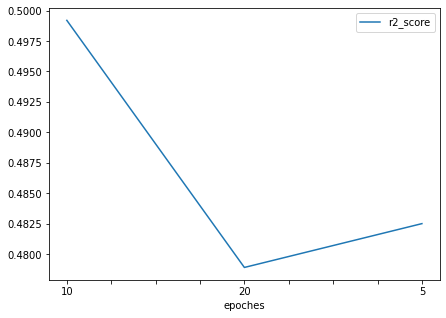

In [170]:
fig_2=pd.DataFrame({"epoches":["10","20","5"],"r2_score":[.4992,.4789,.4825]}).plot(x="epoches",y="r2_score",figsize=(7,5)).get_figure()
fig_2.plt.savefig("Effect Of Epoches On Score.png")